### Libraries and packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


### Import of datas

In [5]:
data = pd.read_csv("/Users/FelicieBizeul/Desktop/ETUDES/ENSAI/Erasmus/SL/project/Try_bow/climate_change_tweets_sample_to_work_on.csv")
data.head()

,Unnamed: 0,username,user_handle,date,retweets,favorites,text,label
0,0,WWF Climate & Energy,climateWWF,2020-04-28,11,22,Economic recovery and national climate pledges...,0
1,1,WWF Climate & Energy,climateWWF,2020-04-22,6,16,In this difficult time it’s hard to connect w...,0
2,2,WWF Climate & Energy,climateWWF,2020-04-01,43,69,The decision to postpone COP is unavoidab...,0
3,3,WWF Climate & Energy,climateWWF,2020-03-30,24,30,Japan the world’s fifth largest emitter of g...,0
4,4,WWF Climate & Energy,climateWWF,2020-03-30,22,40,How can countries include NatureBasedSolutio...,0


### Define the train and test samples of X and Y

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data, data.label, test_size=0.33, random_state=42)

print("X_train.shape is : ", X_train.shape)
print("X_test.shape is : ", X_test.shape)
print("Y_train.shape is : ", Y_train.shape)
print("Y_test.shape is : ", Y_test.shape)

X_train.shape is :  (12066, 8)
X_test.shape is :  (5943, 8)
Y_train.shape is :  (12066,)
Y_test.shape is :  (5943,)


### Instantiation of our bags of words

In [7]:
# Declaration of the object with some conditions
vectorizer = CountVectorizer(stop_words = 'english', binary=True, min_df = 10)

# For create the document term matrix
X_train = vectorizer.fit_transform(X_train["text"])
X_test = vectorizer.transform(X_test["text"])

## KNN

To run the KNN algorithm, we need to transform and generally scaled our datas. Here I just transform our datas thanks the TfidfTransformer function.

In [10]:
tfidf_transformer = TfidfTransformer()

X_train_transform = tfidf_transformer.fit_transform(X_train)
X_test_transform = tfidf_transformer.fit_transform(X_test)

We can perform a 5 fold cross validation to find the best numbers of neighbors (Be careful, it's quite long)

In [11]:
neighbor = [i for i in range(1,100)]
cv_score = np.zeros((len(neighbor),1))

for k in np.arange(len(neighbor)):
    knn_model = KNeighborsClassifier(n_neighbors=neighbor[k], p=2, metric='minkowski')
    score = cross_val_score(knn_model, X_train_transform, Y_train, cv=5, scoring='accuracy')
    cv_score[k] = np.mean(score)

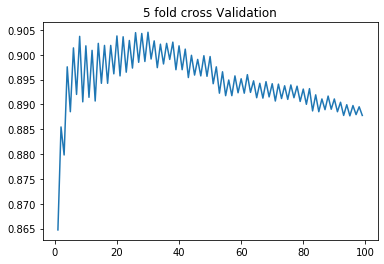

In [13]:
plt.plot(neighbor, cv_score)
plt.title("5 fold cross Validation")
plt.show()

Below, we select the best number of neighbors, that we can see in the plot above.

In [14]:
best_i = np.argmax(cv_score)+1
print("The best number of neighbors is : ", best_i, ".")

The best number of neighbors is :  30 .


In [15]:
knn_model_best = KNeighborsClassifier(n_neighbors = best_i, p = 2, metric = 'minkowski')
knn_model_best.fit(X_train_transform,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [16]:
y_pred_best = knn_model_best.predict(X_train_transform)
con_mat_best = confusion_matrix(Y_train, y_pred_best)
score_train_best = knn_model_best.score(X_train_transform,Y_train)

In [ ]:
y_pred_test_best = knn_model_best.predict(X_test_transform)
con_mat_test_best = confusion_matrix(Y_test, y_pred_test_best)
score_test_best = knn_model_best.score(X_test_transform, Y_test)

### ROC curve for our KNN model

In [ ]:
logit_roc_auc_best = roc_auc_score(Y_test, knn_model_best.predict(X_test_transform))
fpr_b, tpr_b, thresholds_b = roc_curve(Y_test, knn_model_best.predict_proba(X_test_transform)[:,1])

plt.figure()
plt.plot(fpr_b, tpr_b, label='knn best cv(area = %0.2f)' % logit_roc_auc_best)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC curve for knn')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
